In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import csv
import urllib.request

In [2]:
# download the most recent data
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
data_path, _ = urllib.request.urlretrieve(url, 'time_series_19-covid-Confirmed.csv')

In [3]:
# load data
with open(data_path, 'r') as f:
    reader = csv.reader(f, delimiter=',')
    headers = next(reader)
    data = list(reader)
for i, line in enumerate(data):
    if line[-1] == '':
        data[i][-1] = data[i][-2]
countries_list = np.array([x[1] for x in data])
raw_data = np.array([x[4:] for x in data], dtype=int)
days_data = mdates.datestr2num(headers[4:])

In [4]:
# all available countries
np.unique(countries_list)

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada', 'Chile', 'China',
       'Colombia', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cruise Ship', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'Estonia', 'Finland',
       'France', 'French Guiana', 'Georgia', 'Germany', 'Greece',
       'Guyana', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Korea, South', 'Kuwait', 'Latvia',
       'Lebanon', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malaysia',
       'Maldives', 'Malta', 'Martinique', 'Mexico', 'Moldova', 'Monaco',
       'Mongolia', 'Mor

In [5]:
def plot(countries, logscale=False, **kwargs):
    """Do the plotting.

    Arguments:
    countries (str, list): country or list of them
    
    Keyword arguments:
    logscale (bool): plot y in logscale
    kwargs    (dic): optional kwargs for plt.subplots()
    """
    
    # make sure the countries listed are in the data
    countries = np.array(countries, dtype=str, ndmin=1)
    for country in countries:
        assert country in countries_list, '{} not in\
            countries list, please select from \n{}'.format(
            country, np.unique(countries_list))
    
    # initialize the plotting
    if kwargs == None:
        kwargs['dpi'] = 200
    f, ax = plt.subplots(**kwargs)
    if logscale:
        ax.set_yscale('log')
    ax.set_ylabel('Confirmed cases')
    ax.set_xlabel('Days since 22th Jan 2020')
    
    # plot every country
    for country in countries:
        mask = countries_list == country
        if np.sum(mask) > 1:
            plot_data = np.sum(raw_data[mask].squeeze(), axis=0)
        else:
            plot_data = raw_data[mask].squeeze()
        ax.plot(days_data, plot_data, label=country)
    
    f.autofmt_xdate()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
    ax.legend()

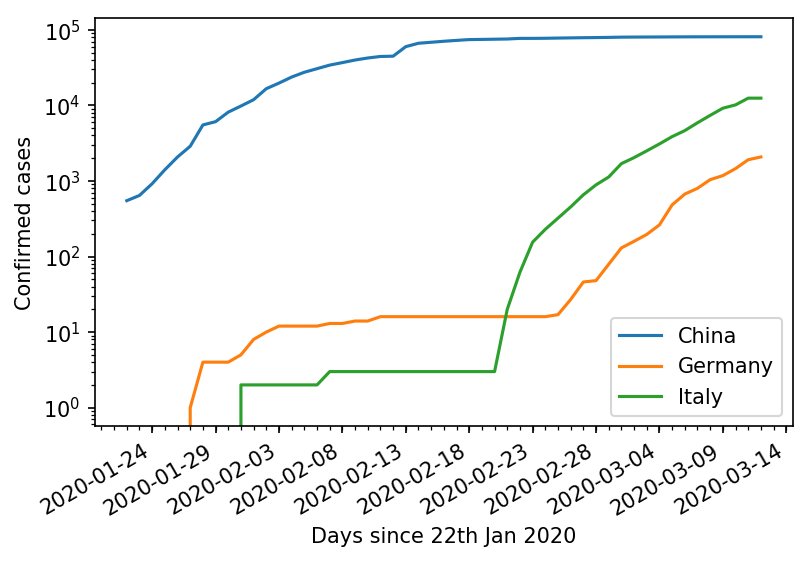

In [6]:
plot(['China', 'Germany', 'Italy'], logscale=True, dpi=150)